# Audio

In [1]:
from utils import load_config
from data_prep import scan_dataset, load_audio, compute_mel, reconstruct_wav

In [2]:
config = load_config("config.yaml")

In [3]:
config

{'audio': {'sample_rate': 22050,
  'n_mels': 80,
  'hop_size': 256,
  'win_size': 1024},
 'training': {'batch_size': 32, 'epochs': 100, 'lr': '1e-4'},
 'paths': {'g2p_file': '.',
  'metadata_dir': './data',
  'output_dir': './outputs'}}

In [4]:
config['paths']['metadata_dir']

'./data'

In [5]:
dataset = scan_dataset(config['paths']['metadata_dir'])

In [6]:
dataset[0][0],

('./data/audio/sin_2241_0329430812.wav',)

In [7]:
dataset[0][1]

'කෝකටත් මං වෙනදා තරම් කාලෙ ගන්නැතිව ඇඳ ගත්තා'

In [8]:
wav, sr = load_audio(dataset[0][0], 48000)

In [9]:
wav.ndim

1

In [10]:
S, S_dB = compute_mel(wav=wav, sr=48000)

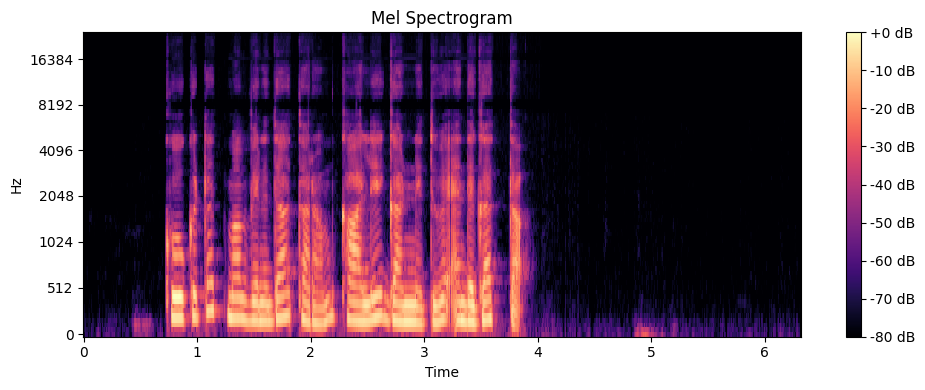

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, hop_length=256, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.tight_layout()
plt.show()


In [12]:
reconstruct_wav(mel=S, sr=48000)

# Text

In [13]:
dataset[2][1]

'ආර්ථික චින්තනය හා සාමාජීය දියුණුව ඇති කළ හැකිවනුයේ පුද්ගල ආර්ථික දියුණුව සලසා දීමෙන්ය'

In [14]:
from g2p import sentence_to_phonemes, rough_g2p_conversion

In [15]:
rough_g2p_conversion(dataset[2][1].split()[0])

['a:', 'r', 'ti', 'kə']

In [16]:
sentence_to_phonemes(dataset[2][1])

['a:',
 'r',
 'ti',
 'kə',
 ' ',
 'ci',
 'n',
 'tə',
 'nə',
 'jə',
 ' ',
 'ha:',
 ' ',
 'sa:',
 'ma:',
 'ɟi:',
 'jə',
 ' ',
 'di',
 'ju',
 'nu',
 'wə',
 ' ',
 'æ',
 'ti',
 ' ',
 'kə',
 'lə',
 ' ',
 'hæ',
 'ki',
 'wə',
 'nu',
 'je:',
 ' ',
 'pu',
 'd',
 'gə',
 'lə',
 ' ',
 'a:',
 'r',
 'ti',
 'kə',
 ' ',
 'di',
 'ju',
 'nu',
 'wə',
 ' ',
 'sə',
 'lə',
 'sa:',
 ' ',
 'di:',
 'me',
 'n',
 'jə',
 ' ']